This is my attempt at recreating the small multiples graph from Flowingdata in matplotlib. I realize the point of the flowingdata article was to showcase filtering and linking using D3.js - but wanted to simply create the chart.

- http://flowingdata.com/2014/10/15/linked-small-multiples/  <br />
- [Small multiples in R](http://flowingdata.com/2013/04/29/small-multiples-in-r/)

You can download the code in this [gist](https://gist.github.com/joelotz/9556db8c1df173decf4b#file-small-multiples)

---------------------------------------

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#from matplotlib import gridspec  #http://matplotlib.org/users/gridspec.html\
import pandas as pd
import matplotlib.ticker as mticker 

In [2]:
data = pd.DataFrame.from_csv('/home/joe/Python/Projects/smallMultiples/askmefi_category_year.tsv', sep='\t')

In [3]:
categories = data.category.unique()
mydata = {}
for i in categories:
    mydata[i] = data[data.category==i]

In [4]:
mydata[categories[0]].head()

category    n
year                                        
2004-01-01  clothing, beauty, & fashion  141
2005-01-01  clothing, beauty, & fashion  203
2006-01-01  clothing, beauty, & fashion  195
2007-01-01  clothing, beauty, & fashion  296
2008-01-01  clothing, beauty, & fashion  432

[5 rows x 2 columns]

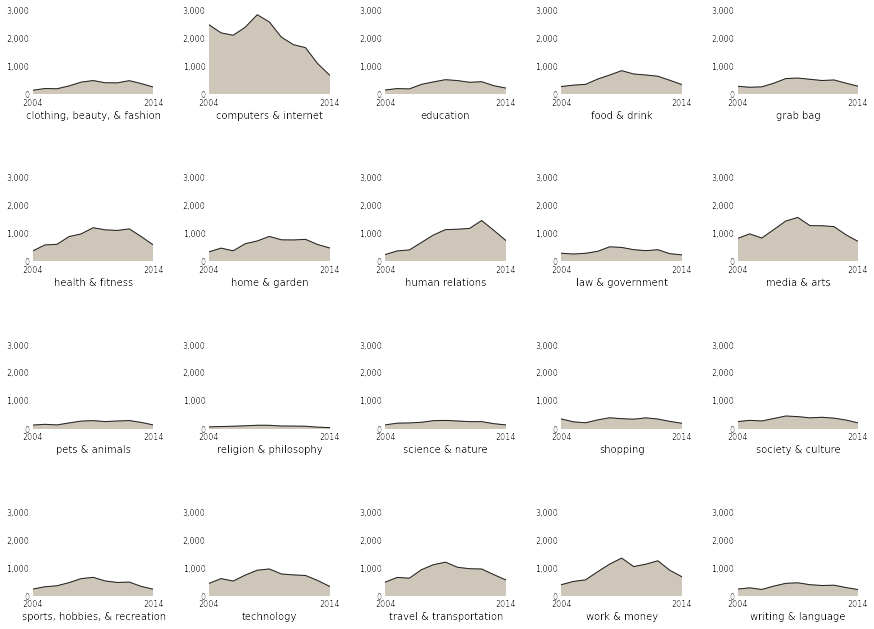

In [5]:
nrows = 4; ncols = 5
num_plots = nrows * ncols  # number of subplots
assert num_plots == len(mydata)

figwidth = 13/1.1
figheight = 10/1.2

x_range = range(2004,2015,1)

fig = plt.figure(figsize=(figwidth, figheight))
#fig = plt.figure()
# create the subplot figure
axes = [plt.subplot(nrows,ncols,i) for i in range(1,num_plots+1)]

# h_pad is horizontal padding between subplots
# w_pad is vertical padding between subplots
plt.tight_layout(pad=0, w_pad=3, h_pad=3)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.01)
plt.subplots_adjust(hspace=1)
plt.rcParams['xtick.major.pad']='8'

for i in range(len(categories)):
    ax = axes[i]
    y = data["n"][data.category==categories[i]]
    x = x_range
    ax.plot(x,y,color='#222222')
    ax.fill_between(x,y,0,color='#cec6b9')

    #ax.xticks(['2004','2014'])
    ax.set_ylim([0,3000])
    ax.set_xlim([2004,2014])
    
    # Remove top and right axes and ticks
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #ax.xticks([0,1], ['2004','2014'], rotation='horizontal')    
    # Find at most 101 ticks on the y-axis at 'nice' locations
    max_yticks = 3
    yloc = plt.MaxNLocator(max_yticks)
    ax.yaxis.set_major_locator(yloc)

    #max_xticks = 4
    #xloc = plt.MaxNLocator(max_xticks)
    #ax.xaxis.set_major_locator(xloc)
    ax.set_xticklabels(['2004','','','','','2014'])
    
    ax.set_xlabel(categories[i])
    ax.tick_params(axis='both', which='major', labelsize=8)
    
    def func(x, pos):  # formatter function takes tick label and tick position
       s = '{:0,d}'.format(int(x))
       return s

    ax.yaxis.set_major_formatter(mticker.FuncFormatter(func)) 

plt.show()


#### Here are is my system configuration used when creating this notebook

In [6]:
%reload_ext version_information
%version_information ipython, pandas, matplotlib

Software versions
Python 2.7.5+ (default, Feb 27 2014, 19:39:55) [GCC 4.8.1]
IPython 2.0.0-dev
OS posix [linux2]
ipython 0.13.2
pandas 0.13.1
matplotlib 1.2.1
<tr><td colspan='2'>Sat Oct 18 14:25:44 2014 PDT</td></tr>